<a href="https://colab.research.google.com/github/AAFREEN-SAYYED/ML-Practical-Solution/blob/gh-pages/ML_7_Practical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Naive Bayes Classifier**


In [ ]:
#Importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [ ]:
df = pd.read_csv('placement.csv')
df

**Preprocessing of data:**

First we have to check that dataset contain any null value or not if it contain we have to apply the some transformation into it.


In [ ]:
df.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
dtype: int64

In [ ]:
#shape method returns a tuple representing the dimensionality of the DataFrame.
df.shape

(215, 14)

In [ ]:
#info() is used to print the concise summary of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
dtypes: float64(5), int64(1), object(8)
memory usage: 23.6+ KB


**Data Visualization:**

It aims to communicate data clearly & efficiently through graphical representation.


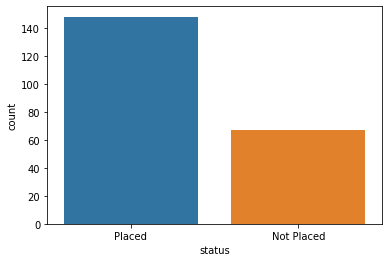

In [ ]:
sns.countplot(x='status',data = df)


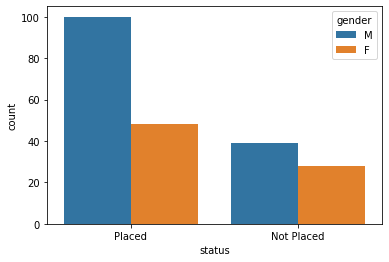

In [ ]:
sns.countplot(x='status',hue='gender',data = df)

In [ ]:
#Convert categorical variable into indicator variables
workexp= pd.get_dummies(df['workex'])
workexp

,No,Yes
0,1,0
1,0,1
2,1,0
3,1,0
4,1,0
...,...,...
210,1,0
211,1,0
212,0,1
213,1,0


In [ ]:
#Concatenate the data into original dataset.
df=pd.concat([df,workexp],axis=1)
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,No,Yes
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,1,0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,0,1
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,1,0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,1,0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,1,0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,1,0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,0,1
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,1,0


In [ ]:
df.drop(['sl_no','gender','ssc_b','hsc_b','hsc_s','degree_t','workex','specialisation'],axis=1,inplace=True)
df

,ssc_p,hsc_p,degree_p,etest_p,mba_p,status,No,Yes
0,67.00,91.00,58.00,55.0,58.80,Placed,1,0
1,79.33,78.33,77.48,86.5,66.28,Placed,0,1
2,65.00,68.00,64.00,75.0,57.80,Placed,1,0
3,56.00,52.00,52.00,66.0,59.43,Not Placed,1,0
4,85.80,73.60,73.30,96.8,55.50,Placed,1,0
...,...,...,...,...,...,...,...,...
210,80.60,82.00,77.60,91.0,74.49,Placed,1,0
211,58.00,60.00,72.00,74.0,53.62,Placed,1,0
212,67.00,67.00,73.00,59.0,69.72,Placed,0,1
213,74.00,66.00,58.00,70.0,60.23,Placed,1,0


In [ ]:
#Training and testing data
X=df.drop('status',axis=1)
y=df['status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)
#Apply the Naive Bayes theorem
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)


GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
#Compare the actual status and predicted status
y_pred=model.predict(X_test)
df1=pd.DataFrame({'Actual Status':y_test,'Predicted Status':y_pred})
df1

,Actual Status,Predicted Status
108,Placed,Placed
207,Placed,Placed
106,Not Placed,Not Placed
107,Placed,Placed
51,Not Placed,Not Placed
...,...,...
114,Placed,Placed
127,Placed,Placed
116,Placed,Placed
117,Placed,Placed


In [ ]:
#Classification Report:
#A Classification report is used to measure the quality of predictions from a classification algorithm.
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

  Not Placed       0.75      0.90      0.82        20
      Placed       0.95      0.87      0.91        45

    accuracy                           0.88        65
   macro avg       0.85      0.88      0.86        65
weighted avg       0.89      0.88      0.88        65



In [ ]:
#Confusion Matrix:
#A confusion matrix is a summary of prediction results on a classification problem. The number of correct and incorrect predictions are summarized with count values and broken down by each class.
print(confusion_matrix(y_test,y_pred))


[[18  2]
 [ 6 39]]


In [ ]:
#Accuracy Score:
print(accuracy_score(y_test,y_pred)*100)

87.6923076923077
